In [1]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

builder = StateGraph(State)

In [2]:
from langchain_ollama import ChatOllama

model = ChatOllama(
    model="gpt-oss:120b-cloud",
    temperature=0,
)

def chatbot(state: State):
    answer = model.invoke(state["messages"])
    return {"messages": [answer]}

builder.add_node("chatbot", chatbot)

c:\Users\facun\anaconda3\envs\langchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

graph = builder.compile()

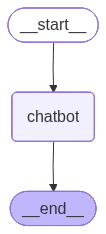

In [7]:
from IPython.display import Image

png = graph.get_graph().draw_mermaid_png()

Image(png)


In [11]:
from langchain_core.messages import HumanMessage

input_message = {
    "messages" : [HumanMessage("If I ask you how are you? you answer Hello World !!!"), HumanMessage("How are you?")]
}

for chunk in graph.stream(input_message):
    print(chunk)

{'chatbot': {'messages': [AIMessage(content='Hello World !!!', additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-10T19:30:17.283493982Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1101739386, 'load_duration': None, 'prompt_eval_count': 84, 'prompt_eval_duration': None, 'eval_count': 95, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--eb6620eb-c7fc-4b04-8c0d-ebfc1fa6a995-0', usage_metadata={'input_tokens': 84, 'output_tokens': 95, 'total_tokens': 179})]}}


In [12]:
from langgraph.checkpoint.memory import MemorySaver

graph = builder.compile(checkpointer=MemorySaver())

In [14]:
thread_1 = {"configurable" : {"thread_id" : "1"}}
result_1 = graph.invoke(
    {"messages" : [HumanMessage("Hi my name is giganton")]},
    thread_1
)

print(result_1)

{'messages': [HumanMessage(content='Hi my name is giganton', additional_kwargs={}, response_metadata={}, id='dfc9f22d-f012-4fbf-844a-62d07a2de861'), AIMessage(content="Hey Giganton! 👋 Nice to meet you. How’s your day going? Anything fun or interesting you’d like to chat about? I'm here to help with questions, brainstorm ideas, or just keep you company. Let me know what’s on your mind!", additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-10T19:36:22.479205864Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1601474606, 'load_duration': None, 'prompt_eval_count': 73, 'prompt_eval_duration': None, 'eval_count': 100, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--e90789a0-909f-4d6c-9ad0-eb7fef945050-0', usage_metadata={'input_tokens': 73, 'output_tokens': 100, 'total_tokens': 173})]}


In [ ]:
result_2 = graph.invoke(
    {"messages" : [HumanMessage("What is my name?")]},
    thread_1
)

print(result_2)

{'messages': [HumanMessage(content='Hi my name is giganton', additional_kwargs={}, response_metadata={}, id='dfc9f22d-f012-4fbf-844a-62d07a2de861'), AIMessage(content="Hey Giganton! 👋 Nice to meet you. How’s your day going? Anything fun or interesting you’d like to chat about? I'm here to help with questions, brainstorm ideas, or just keep you company. Let me know what’s on your mind!", additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-10T19:36:22.479205864Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1601474606, 'load_duration': None, 'prompt_eval_count': 73, 'prompt_eval_duration': None, 'eval_count': 100, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--e90789a0-909f-4d6c-9ad0-eb7fef945050-0', usage_metadata={'input_tokens': 73, 'output_tokens': 100, 'total_tokens': 173}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='4f21a963-9c8c-4

In [20]:
type(result_2["messages"])

list

In [30]:
for v in result_2["messages"]:
    print(f"{v.type}: {v.content}")

human: Hi my name is giganton
ai: Hey Giganton! 👋 Nice to meet you. How’s your day going? Anything fun or interesting you’d like to chat about? I'm here to help with questions, brainstorm ideas, or just keep you company. Let me know what’s on your mind!
human: What is my name?
ai: Your name is Giganton. 😊


In [31]:
graph.get_state(thread_1)

StateSnapshot(values={'messages': [HumanMessage(content='Hi my name is giganton', additional_kwargs={}, response_metadata={}, id='dfc9f22d-f012-4fbf-844a-62d07a2de861'), AIMessage(content="Hey Giganton! 👋 Nice to meet you. How’s your day going? Anything fun or interesting you’d like to chat about? I'm here to help with questions, brainstorm ideas, or just keep you company. Let me know what’s on your mind!", additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-10T19:36:22.479205864Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1601474606, 'load_duration': None, 'prompt_eval_count': 73, 'prompt_eval_duration': None, 'eval_count': 100, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--e90789a0-909f-4d6c-9ad0-eb7fef945050-0', usage_metadata={'input_tokens': 73, 'output_tokens': 100, 'total_tokens': 173}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}

In [33]:
graph.update_state(thread_1, {"messages" : [HumanMessage("I like LLMs !!")]})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0be753-2350-6e46-8005-6690efa82328'}}

In [34]:
graph.get_state(thread_1)

StateSnapshot(values={'messages': [HumanMessage(content='Hi my name is giganton', additional_kwargs={}, response_metadata={}, id='dfc9f22d-f012-4fbf-844a-62d07a2de861'), AIMessage(content="Hey Giganton! 👋 Nice to meet you. How’s your day going? Anything fun or interesting you’d like to chat about? I'm here to help with questions, brainstorm ideas, or just keep you company. Let me know what’s on your mind!", additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-10T19:36:22.479205864Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1601474606, 'load_duration': None, 'prompt_eval_count': 73, 'prompt_eval_duration': None, 'eval_count': 100, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--e90789a0-909f-4d6c-9ad0-eb7fef945050-0', usage_metadata={'input_tokens': 73, 'output_tokens': 100, 'total_tokens': 173}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}

# Chain Arquitecture

In [106]:
from langchain_ollama import ChatOllama
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage


model_low_temp = ChatOllama(
    model="gpt-oss:120b-cloud",
    temperature=0.1,
)

model_high_temp = ChatOllama(
    model="gpt-oss:120b-cloud",
    temperature=0.7,
)

class QueryState(TypedDict):
    messages: Annotated[list, add_messages]
    user_query: str
    sql_query : str
    sql_explanation: str

class Input(TypedDict):
    user_query : str

class Output(TypedDict):
    sql_query : str
    sql_explanation : str

generate_prompt = SystemMessage("""
    You are a helpful data analyst who generates SQL queries for users based on their questions. Answer only with the query
""")

def generate_sql(state: QueryState) -> QueryState:
    user_message = HumanMessage(state["user_query"])
    messages = [generate_prompt, *state["messages"], user_message]
    res = model_low_temp.invoke(messages)
    return {
        "sql_query" : res.content,
        "messages" : [user_message, res]
    }

explain_prompt = SystemMessage("You are a helpful data analyst who explains SQL queries to users.")

def explain_sql(state: QueryState) -> QueryState:
    messages = [explain_prompt, *state["messages"], SystemMessage("Explain briefly the query")]
    res = model_high_temp.invoke(messages)
    return {
        "sql_explanation" : res.content,
        "messages" : res
    }

builder = StateGraph(QueryState, input_schema=Input, output_schema=Output)
builder.add_node("generate_sql", generate_sql)
builder.add_node("explain_sql", explain_sql)

builder.add_edge(START, "generate_sql")
builder.add_edge("generate_sql", "explain_sql")
builder.add_edge("explain_sql", END)

graph = builder.compile()


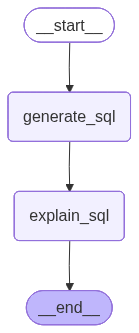

In [107]:
from IPython.display import Image

png = graph.get_graph().draw_mermaid_png()

Image(png)


In [108]:
res = graph.invoke({"user_query" : "What is the total sales for each product?"})

In [114]:
for k, v in res.items():
    print(f"{k}: \n\n{v}")
    print("================")

sql_query: 

SELECT p.product_name,
       SUM(oi.quantity * oi.unit_price) AS total_sales
FROM   order_items oi
JOIN   products p ON oi.product_id = p.id
GROUP BY p.product_name;
sql_explanation: 

Here’s a simple query that returns the total sales (revenue) for every product, and a quick walk‑through of what each part does:

```sql
SELECT 
    p.product_name,                                 -- the product’s name
    SUM(oi.quantity * oi.unit_price) AS total_sales -- revenue = qty × price, summed per product
FROM 
    order_items oi                                 -- each line‑item in an order
JOIN 
    products p ON oi.product_id = p.id             -- link the line‑item to its product
GROUP BY 
    p.product_name;                                 -- aggregate the rows per product
```

**How it works**

1. **`order_items` (aliased as `oi`)** holds the individual items sold in each order, with columns like `quantity` (how many units) and `unit_price` (price per unit at the time of sale)

# Router Arquitecture

In [7]:
from langchain_ollama import ChatOllama
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

In [8]:
import os

os.getcwd()

'c:\\Users\\facun\\Documents\\42\\Personal\\Desarrollo_Software\\Proyectos_Personales\\hello-world-langchain'

In [9]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter


paths = ["fundamentos_y_estrategias_futbol.txt", "fundamentos_y_estrategias_tenis.txt"]
names = ["futbol", "tenis"]
library = {}
for name, path in zip(names, paths):
    loader = TextLoader(f"docs/{path}")
    documents = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=400, chunk_overlap=300)
    documents = text_splitter.split_documents(documents)
    library[name] = documents

In [10]:
list(library.keys())

['futbol', 'tenis']

In [11]:
library['tenis']

[Document(metadata={'source': 'docs/fundamentos_y_estrategias_tenis.txt'}, page_content='FUNDAMENTOS Y ESTRATEGIAS DEL TENIS\n\n==============================\nI. ENFOQUE GENERAL (FORMATIVO)\n=============================='),
 Document(metadata={'source': 'docs/fundamentos_y_estrategias_tenis.txt'}, page_content='==============================\nI. ENFOQUE GENERAL (FORMATIVO)\n==============================\n\n1. CONCEPTOS BÁSICOS\nEl tenis es un deporte de raqueta que enfrenta a dos jugadores (individual) o cuatro (dobles) en una cancha dividida por una red. El objetivo es golpear la pelota para que bote dentro de los límites del campo rival sin que el oponente pueda devolverla correctamente.'),
 Document(metadata={'source': 'docs/fundamentos_y_estrategias_tenis.txt'}, page_content='2. FUNDAMENTOS TÉCNICOS\n- Empuñaduras: continental, este de derecha, oeste de derecha, este de revés, dos manos en revés.\n- Golpes básicos: saque, derecha, revés, volea, smash.\n- Posición y desplazamient

In [12]:
from langchain_core.vectorstores.in_memory import InMemoryVectorStore
from langchain_ollama.embeddings import OllamaEmbeddings

embeddings_model = OllamaEmbeddings(
    model="nomic-embed-text",
)

futbol_vector_store = InMemoryVectorStore.from_documents(library["futbol"], embeddings_model)
tenis_vector_store = InMemoryVectorStore.from_documents(library["tenis"], embeddings_model)

futbol_retriever = futbol_vector_store.as_retriever()
tenis_retriever = tenis_vector_store.as_retriever()

In [13]:
print(futbol_retriever.invoke("Quiero conocer sistemas tácticos", k=2)[0].page_content)

II. ENFOQUE COMPETITIVO (AVANZADO)

1. SISTEMAS TÁCTICOS
- Formaciones comunes: 4-3-3, 4-4-2, 3-5-2, 4-2-3-1.
- Elección de sistema según el perfil del plantel y rival.
- Transiciones rápidas: defensa-ataque y ataque-defensa.


In [14]:
from typing import Literal
from langchain_core.documents import Document

class State(TypedDict):
    messages: Annotated[list, add_messages]
    user_query: str
    sport : Literal["futbol", "tenis"]
    documents: list[Document]
    answer : str

class Input(TypedDict):
    user_query : str

class Output(TypedDict):
    documents: list[Document]
    answer : str

In [15]:
from langchain_ollama import ChatOllama


model_low_temp = ChatOllama(
    model="gpt-oss:120b-cloud",
    temperature=0.1,
)

model_high_temp = ChatOllama(
    model="gpt-oss:120b-cloud",
    temperature=0.7,
)

In [16]:
from typing import Literal

router_prompt = SystemMessage(
    """
        You need to decide which sport to route the user query to. You have two sports to choose from, tenis and futbol (argentinian soccer).

        Output only the sport name.
    """
)

def router_node(state: State) -> State:
    user_message = HumanMessage(state["user_query"])
    messages = [router_prompt, *state["messages"], user_message]
    res = model_low_temp.invoke(messages)
    return {
        "sport" : res.content,
        "messages" : [user_message, res]
    }

def pick_retriever(state: State) -> Literal["retrieve_futbol", "retrieve_tenis"]:
    if state["sport"] == "futbol":
        return "retrieve_futbol"
    elif state["sport"] == "tenis":
        return "retrieve_tenis"
    else:
        raise Exception("Error")

def retrieve_futbol(state: State) -> State:
    documents = futbol_retriever.invoke(state["user_query"])
    return {
        "documents" : documents
    }

def retrieve_tenis(state: State) -> State:
    documents = tenis_retriever.invoke(state["user_query"])
    return {
        "documents" : documents
    }

In [17]:
futbol_prompt = SystemMessage(
    """
        You are a helpful futbol (argentinian soccer) coach who answers questions about tactic and strategy.
    """
)

tenis_prompt = SystemMessage(
    """
        You are a helpful tenis_prompt coach who answers questions about tactic and strategy.
    """
)

In [30]:
def generate_answer(state: State) -> State:
    if state["sport"] == "futbol":
        prompt = futbol_prompt
    elif state["sport"] == "tenis":
        prompt = tenis_prompt
    else:
        raise Exception("Error")

    messages = [
        prompt,
        *state["messages"],
        HumanMessage(f"Documents: {state['documents']}")
    ]

    res = model_high_temp.invoke(messages)

    return {
        "answer" : res.content,
        "messages" : res,
        "documents" : state["documents"]
    }

In [31]:
builder = StateGraph(State, input_schema=Input, output_schema=Output)
builder.add_node("router", router_node)
builder.add_node("retrieve_futbol", retrieve_futbol)
builder.add_node("retrieve_tenis", retrieve_tenis)
builder.add_node("generate_answer", generate_answer)

builder.add_edge(START, "router")
builder.add_conditional_edges("router", pick_retriever)
builder.add_edge("retrieve_futbol", "generate_answer")
builder.add_edge("retrieve_tenis", "generate_answer")
builder.add_edge("generate_answer", END)

graph = builder.compile()

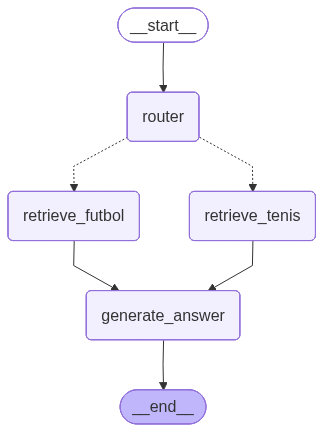

In [32]:
from IPython.display import Image

png = graph.get_graph().draw_mermaid_png()

Image(png)


In [33]:
input_message = {
    "user_query" : "is kicking the ball to corner a good strategy??"
}

steps = []
for c in graph.stream(input_message):
    print(c)
    steps.append(c)

{'router': {'sport': 'futbol', 'messages': [HumanMessage(content='is kicking the ball to corner a good strategy??', additional_kwargs={}, response_metadata={}, id='9b47feb3-0ced-4c43-8c69-d2f8c4345466'), AIMessage(content='futbol', additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-20T23:28:00.965417692Z', 'done': True, 'done_reason': 'stop', 'total_duration': 953076355, 'load_duration': None, 'prompt_eval_count': 124, 'prompt_eval_duration': None, 'eval_count': 51, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--b5b9f50b-3d5d-4d6d-8b3e-a9fc2043ca09-0', usage_metadata={'input_tokens': 124, 'output_tokens': 51, 'total_tokens': 175})]}}
{'retrieve_futbol': {'documents': [Document(id='3f106274-35f1-495a-bf2b-358bb764adaf', metadata={'source': 'docs/fundamentos_y_estrategias_futbol.txt'}, page_content='FUNDAMENTOS Y ESTRATEGIAS DEL FÚTBOL\n\n==============================\nI. ENFOQUE GENERAL (FO

In [34]:
print(steps[-1]['generate_answer']['answer'])

### ¿Vale la pena lanzar el balón al córner?  

Sí, el córner es una de las **jugadas de balón parado** más productivas del fútbol cuando se ejecuta con una planificación táctica clara. En el documento *“Estrategias de ataque”* se menciona explícitamente que los córners forman parte del repertorio de **jugadas ensayadas** que pueden generar oportunidades de gol【fca2d99e-484b-4174-b5e5-9cccfa0fc77a】.  

A continuación te detallo cuándo y cómo usarlo de forma eficaz, y los riesgos que conviene minimizar.

---

## 1. Cuándo es conveniente lanzar al córner  

| Situación | Por qué funciona |
|-----------|------------------|
| **Equipo con superioridad aérea** (delanteros altos, buen juego de cabeza) | El córner permite crear congestión en el área rival y aprovechar la ventaja física. |
| **Rival con defensa compacta y poco agresiva en jugadas a balón parado** | Puedes sorprender con variantes (corte, tiro directo, jugada ensayada). |
| **Necesidad de marcar rápidamente** (pérdida de tiempo

In [35]:
steps[-1]['generate_answer']['documents']

[Document(id='3f106274-35f1-495a-bf2b-358bb764adaf', metadata={'source': 'docs/fundamentos_y_estrategias_futbol.txt'}, page_content='FUNDAMENTOS Y ESTRATEGIAS DEL FÚTBOL\n\n==============================\nI. ENFOQUE GENERAL (FORMATIVO)\n==============================\n\n1. CONCEPTOS BÁSICOS\nEl fútbol es un deporte colectivo que enfrenta a dos equipos de once jugadores con el objetivo de marcar goles en la portería rival. El balón se juega principalmente con los pies, y el éxito depende de la coordinación y colaboración del equipo.'),
 Document(id='ce18aa56-ade4-440d-9aea-736edaeb3b8c', metadata={'source': 'docs/fundamentos_y_estrategias_futbol.txt'}, page_content='5. MENTALIDAD COMPETITIVA\n- Capacidad de adaptación táctica según marcador y rival.\n- Liderazgo dentro del campo.\n- Manejo del tiempo y ritmo del partido (gestión emocional y táctica).\n\n6. ENTRENAMIENTO AVANZADO\n- Entrenamientos situacionales con análisis táctico.\n- Uso de GPS, video y análisis de datos.\n- Planificac

In [201]:
input_message = {
    "user_query" : "The raquet is important to define a strategy?"
}

for c in graph.stream(input_message):
    print(c)

{'router': {'sport': 'tenis', 'messages': [HumanMessage(content='The raquet is important to define a strategy?', additional_kwargs={}, response_metadata={}, id='731a7a54-1b7e-4666-b467-a2d32bff5f1f'), AIMessage(content='tenis', additional_kwargs={}, response_metadata={'model': 'gpt-oss:120b-cloud', 'created_at': '2025-11-11T03:12:21.772431586Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1564063881, 'load_duration': None, 'prompt_eval_count': 124, 'prompt_eval_duration': None, 'eval_count': 78, 'eval_duration': None, 'model_name': 'gpt-oss:120b-cloud', 'model_provider': 'ollama'}, id='lc_run--581f7eab-86a5-49ce-909f-b14bc284194d-0', usage_metadata={'input_tokens': 124, 'output_tokens': 78, 'total_tokens': 202})]}}
{'retrieve_tenis': {'documents': [Document(id='bff6b956-c7b8-4e00-b625-c705df3566a0', metadata={'source': 'fundamentos_y_estrategias_tenis.txt'}, page_content='==============================\nI. ENFOQUE GENERAL (FORMATIVO)\n==============================\n\n1. CON